In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image

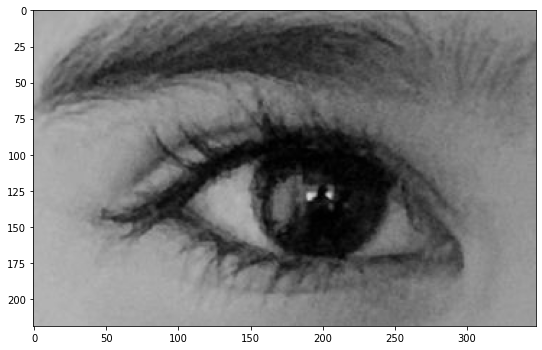

In [5]:
img = Image.open('Desktop/dddd.png')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

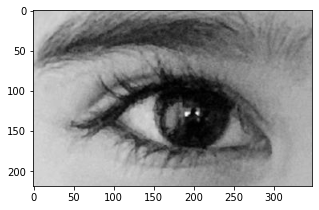

In [8]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(5,5))
plt.imshow(imgmat, cmap='gray');

In [9]:
U, sigma, V = np.linalg.svd(imgmat)

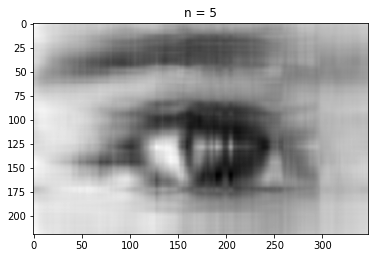

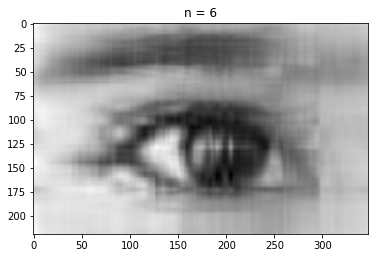

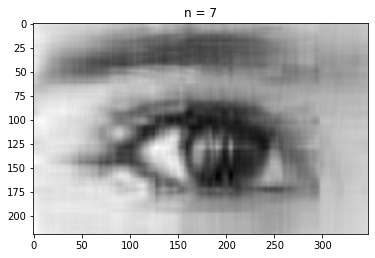

In [21]:
for i in range(5, 8):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

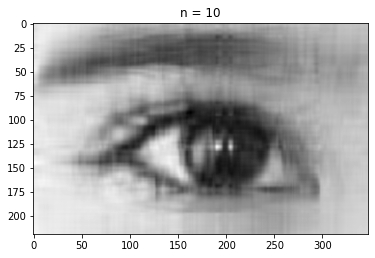

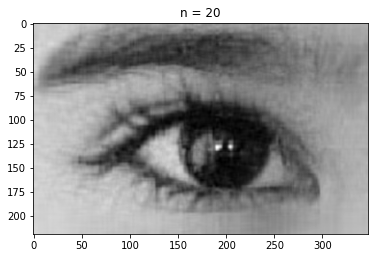

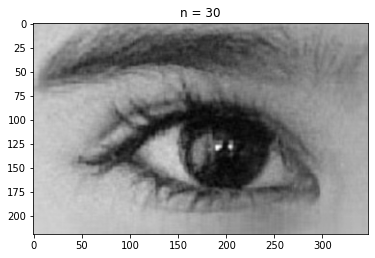

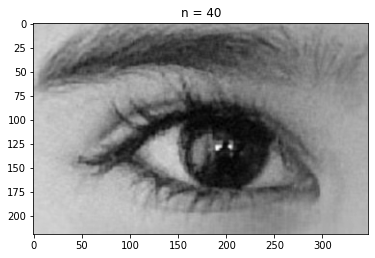

In [25]:
for i in range(10, 50, 10):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

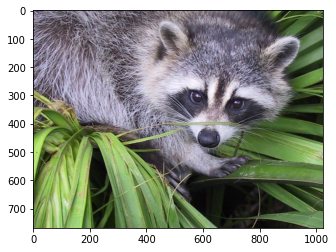

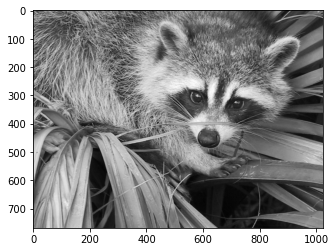

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1024 is different from 768)

In [28]:
from scipy import misc

img = misc.face()

type(img)

import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

img.shape

img.ndim

img[:, :, 0]

#As expected, this is a 768x1024 matrix:

img[:, :, 0].shape

img_array = img / 255

img_array.max(), img_array.min()

img_array.dtype

red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]


from numpy import linalg

img_gray = img_array @ [0.2126, 0.7152, 0.0722]

img_gray.shape

plt.imshow(img_gray, cmap="gray")
plt.show()

U, s, Vt = linalg.svd(img_gray)

U.shape, s.shape, Vt.shape

s @ Vt

import numpy as np

Sigma = np.zeros((U.shape[1], Vt.shape[0]))
np.fill_diagonal(Sigma, s)

linalg.norm(img_gray - U @ Sigma @ Vt)

np.allclose(img_gray, U @ Sigma @ Vt)

plt.plot(s)
plt.show()

approx = U @ Sigma[:, :k] @ Vt[:k, :]

plt.imshow(approx, cmap="gray")
plt.show()

img_array.shape

np.transpose(x, axes=(i, j, k))

img_array_transposed = np.transpose(img_array, (2, 0, 1))
img_array_transposed.shape

U, s, Vt = linalg.svd(img_array_transposed)

U.shape, s.shape, Vt.shape


Sigma = np.zeros((3, 768, 1024))
for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :])

reconstructed = U @ Sigma @ Vt

reconstructed.min(), reconstructed.max()

reconstructed = np.clip(reconstructed, 0, 1)
plt.imshow(np.transpose(reconstructed, (1, 2, 0)))
plt.show()

approx_img = U @ Sigma[..., :k] @ Vt[..., :k, :]

approx_img.shape

plt.imshow(np.transpose(approx_img, (1, 2, 0)))
plt.show()

In [30]:
import numpy as np
from PIL import Image
from numpy import array
import sys
from numpy import diag
from scipy.linalg import svd

def low_rank_k(u,s,vh,num):
    u = u[:,:num]
    vh = vh[:num,:]
    s = s[:num]
    s = np.diag(s)
    my_low_rank = np.dot(np.dot(u,s),vh)
    return my_low_rank

def compress_grayscale(k, arr_img):
    u, s, vT = svd(arr_img)
    my_rank_k = low_rank_k(u, s, vT, k)
    img1 = Image.fromarray(my_rank_k)
    img1.show()

def compress_RGB(k, arr_img):
    red = arr_img[:, :, 0]
    green = arr_img[:, :, 1]
    blue = arr_img[:, :, 2]

    u, s, vT = svd(red)
    my_rank_k_r = low_rank_k(u, s, vT, k)

    for row in my_rank_k_r:
        j = 0
        for i in row:
            if(i>255):
                row[j]=255
            elif(i<0):
                row[j] = 0
            j = j + 1

    u, s, vT = svd(green)
    my_rank_k_g = low_rank_k(u, s, vT, k)

    for row in my_rank_k_g:
        j = 0
        for i in row:
            if(i>255):
                row[j]=255
            elif(i<0):
                row[j] = 0
            j = j + 1

    u, s, vT = svd(blue)
    my_rank_k_b = low_rank_k(u, s, vT, k)

    for row in my_rank_k_b:
        j = 0
        for i in row:
            if(i>255):
                row[j]=255
            elif(i<0):
                row[j] = 0
            j = j + 1

    svd_RGB=np.zeros((my_rank_k_b.shape[0], my_rank_k_b.shape[1], 3), dtype='uint8')

    svd_RGB[:, :, 0] = my_rank_k_r
    svd_RGB[:, :, 1] = my_rank_k_g
    svd_RGB[:, :, 2] = my_rank_k_b

    img2 = Image.fromarray(svd_RGB, "RGB")
    img2.save('svd_RGB.png')
    img2.show()




np.set_printoptions(threshold=sys.maxsize)

img_grayscale = Image.open('Desktop/dddd.png')
arr_img_grayscale = array(img_grayscale)
compress_grayscale(100,arr_img_grayscale)

#img_RGB = Image.open('../data/RGB.jfif')
#arr_img_RGB = array(img_RGB)
#compress_RGB(100,arr_img_RGB)


ValueError: expected matrix